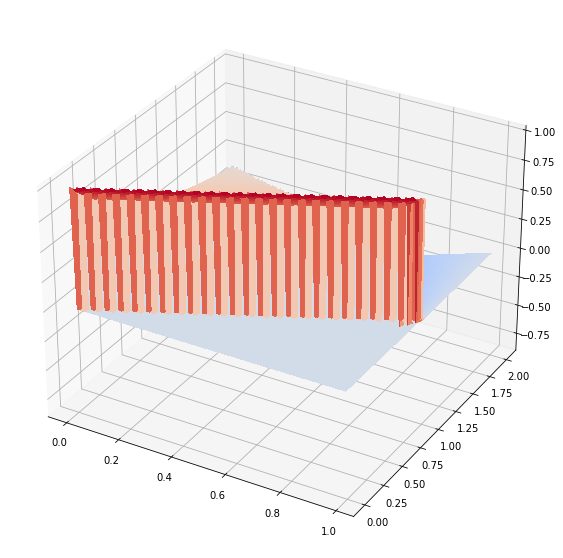

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def H(t):
    n, m = t.shape
    for i in range(n):
        for j in range(m):
            if t[i][j] >= 0:
                t[i][j] = 1
            else:
                t[i][j] = 0

    return t


l = 1
E = 1
rho = 1
M = 1
sigma_0 = 1

C_0 = np.sqrt(E / rho)
alpha = rho * C_0 / M

x = np.arange(0, l, 0.01)
t = np.arange(0, 2, 10 ** (-3))

xv, tv = np.meshgrid(x, t)
sigma = np.exp(-alpha * (tv - xv / C_0)) * H(tv - xv / C_0) - np.exp(-alpha * (tv - (2 * l - x) / C_0)) * H(
    tv - (2 * l - x) / C_0)


fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xv, tv, sigma, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [30]:
t.size

2000

Text(0.5, 1.0, 'Напряжение от координаты')

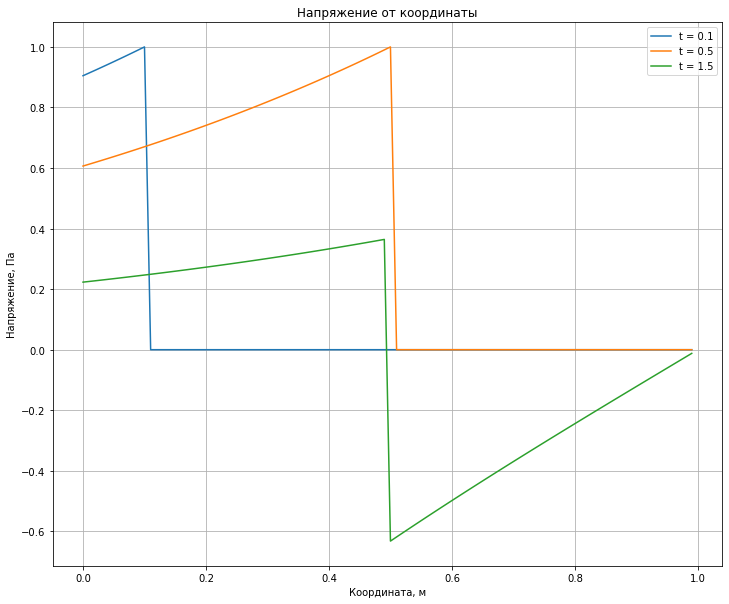

In [33]:
fig = plt.figure(figsize=(12,10))

plt.plot(x, sigma[100,:], label = "t = {}".format(t[100]))
plt.plot(x, sigma[500,:], label = "t = {}".format(t[500]))
plt.plot(x, sigma[1500,:], label = "t = {}".format(t[1500]))
plt.legend()
plt.grid()
plt.xlabel("Координата, м")
plt.ylabel("Напряжение, Па")
plt.title("Напряжение от координаты")

In [34]:
x.size

100

Text(0.5, 1.0, 'Напряжение от времени')

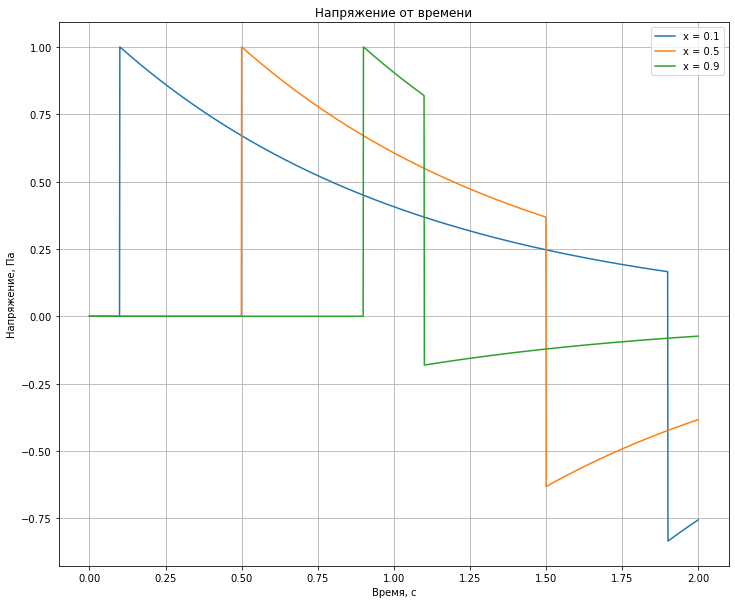

In [36]:
fig = plt.figure(figsize=(12,10))

plt.plot(t, sigma[:,10], label = "x = {}".format(x[10]))
plt.plot(t, sigma[:,50], label = "x = {}".format(x[50]))
plt.plot(t, sigma[:,90], label = "x = {}".format(x[90]))
plt.legend()
plt.grid()
plt.xlabel("Время, с")
plt.ylabel("Напряжение, Па")
plt.title("Напряжение от времени")

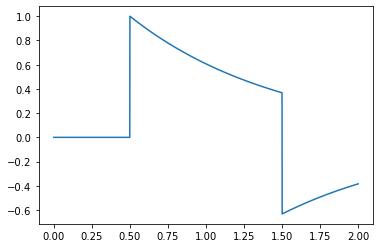

In [26]:
plt.plot(t, sigma[:, 50])

In [9]:
t.shape

(300,)

IndexError: index 500 is out of bounds for axis 0 with size 300

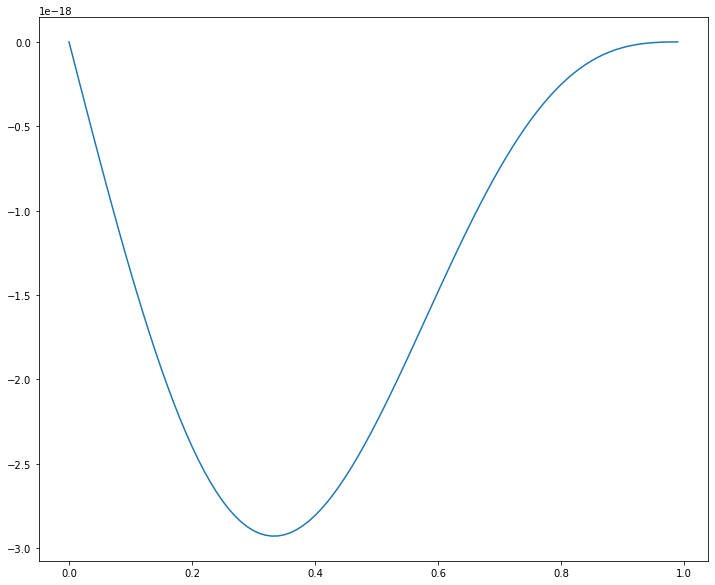

In [11]:
string = "t = {}".format(t[4])
fig = plt.figure(figsize=(12,10))
plt.plot(x, sigma[200,:], label = "t = {}".format(t[200]))
plt.plot(x, sigma[500,:], label = "t = {}".format(t[500]))
plt.plot(x, sigma[9000,:], label = "t = {}".format(t[9000]))
plt.plot(x, sigma[9900,:], label = "t = {}".format(t[9900]))
plt.plot(x, sigma[10000-1,:], label = "t = {}".format(t[10000-1]))
plt.xlabel("x, m")
plt.ylabel("Sigma, Pa")
plt.legend()

[[ 1.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.9990005   0.          0.         ...  0.          0.
   0.        ]
 [ 0.998002    0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.1357419  -0.85591832 -0.84465962 ... -0.02214241 -0.01476037
  -0.00737982]
 [ 0.13560622 -0.85506282 -0.84381538 ... -0.02212027 -0.01474562
  -0.00737244]
 [ 0.13547069 -0.85420819 -0.84297199 ... -0.02209816 -0.01473088
  -0.00736507]]


FileNotFoundError: [WinError 2] Не удается найти указанный файл

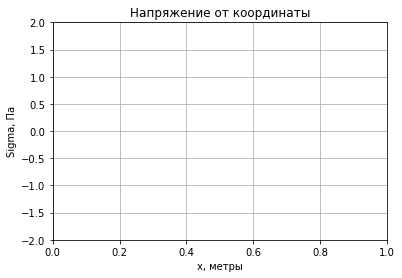

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def H(t):
    n, m = t.shape
    for i in range(n):
        for j in range(m):
            if t[i][j] >= 0:
                t[i][j] = 1
            else:
                t[i][j] = 0

    return t


l = 1
E = 1
rho = 1
M = 1
sigma_0 = 1

C_0 = np.sqrt(E / rho)
alpha = rho * C_0 / M

x = np.arange(0, l, 0.01)
t = np.arange(0, 2, 10 ** (-3))

xv, tv = np.meshgrid(x, t)
sigma = np.exp(-alpha * (tv - xv / C_0)) * H(tv - xv / C_0) - np.exp(-alpha * (tv - (2 * l - x) / C_0)) * H(
    tv - (2 * l - x) / C_0)

print(sigma)
fig, ax = plt.subplots()
ln, = plt.plot([], [], 'k')
plt.grid()

def init():
    ax.set_xlim(0, l)
    ax.set_ylim(-2, 2)
    plt.xlabel("х, метры")
    plt.ylabel("Sigma, Па")
    plt.title("Напряжение от координаты")
    return ln,

def update(frame):
    ln.set_data(x, sigma[frame,:])
    return ln,

anim = animation.FuncAnimation(fig, update, frames=np.arange(0, len(t), 100),
                    init_func=init, blit=True)
writervideo = animation.FFMpegWriter(fps=60)
anim.save(r'increasingStraightLine.mp4', writer=writervideo)